In [2]:
%reset -f
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
from scipy.sparse import lil_matrix


def generate_full_rank_sparse_integer_system(N, density=0.01, value_range=(-10, 10), random_state=None):
    """
    フルランクなスパース整数連立一次方程式 Ax = b を生成する。
    
    N: 変数（=行数=列数）
    density: 全体に占める非ゼロ要素割合
    value_range: 非ゼロ整数値の範囲（例：(-5, 5)）
    """
    if random_state is not None:
        np.random.seed(random_state)

    A = lil_matrix((N, N), dtype=int)

    # ステップ1: 各行に1つ以上の非ゼロ（対角線に1を置くことでrankを確保）
    for i in range(N):
        val = 0
        while val == 0:
            val = np.random.randint(value_range[0], value_range[1] + 1)
        A[i, i] = val

    # ステップ2: ランダムな位置に追加で非ゼロ整数を入れる（スパース性の調整）
    total_nonzeros_target = int(N * N * density)
    current_nonzeros = N  # すでに対角にN個ある
    while current_nonzeros < total_nonzeros_target:
        i = np.random.randint(0, N)
        j = np.random.randint(0, N)
        if A[i, j] == 0:
            val = 0
            while val == 0:
                val = np.random.randint(value_range[0], value_range[1] + 1)
            A[i, j] = val
            current_nonzeros += 1

    # bベクトルも整数で
    b = np.random.randint(value_range[0], value_range[1] + 1, size=N)
    if np.linalg.matrix_rank(A.toarray()) < N:
        return generate_full_rank_sparse_integer_system(N, density, value_range, random_state)

    return A.tocsr(), b

N = 5
A, b = generate_full_rank_sparse_integer_system(N, density=0.5, value_range=(-5, 5))
print(f"A.shape = {A.shape}, non zero = {A.nnz}, rank = {np.linalg.matrix_rank(A.toarray())}")
print(A.toarray()) 
print(b)

A.shape = (5, 5), non zero = 12, rank = 5
[[ 4  0  0  0  4]
 [ 0 -5  5 -4  3]
 [ 0  0  5  0  0]
 [-1  5 -3 -3  0]
 [ 0  0  0  0 -3]]
[ 1  3  0  0 -1]


In [ ]:
from mechanics import *
import string

vars = string.ascii_lowercase[:N]

system = (
    System()
    .add_variable(' '.join(vars))
)
for i in range(N):
    system.equate(
        '+'.join([f'{A[i, j]}*{vars[j]}' for j in range(N)]),
        b[i],
    )
system.show_all()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indices: ()
Input: ()
Index combinations: ({},)
Input on this combo: {}, set()


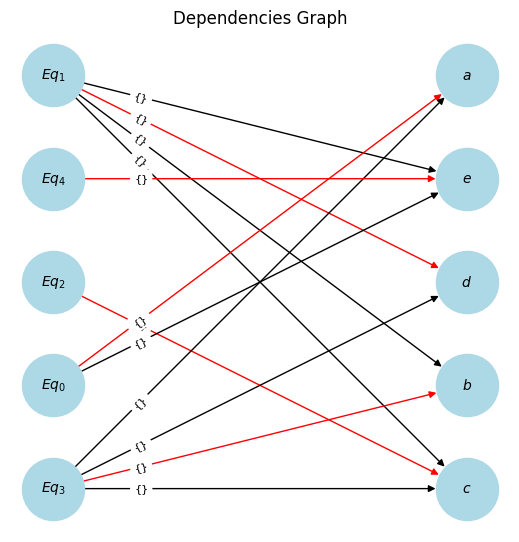

output: {e, c, d, a, b}
True
defaultdict(<class 'dict'>, {Eq_2: 5*c = 0: {c: 5}})
defaultdict(<class 'dict'>, {Eq_4: -3*e = -1: {e: -3}})
defaultdict(<class 'dict'>, {Eq_0: 4*a + 4*e = 1: {a: 4}})
defaultdict(<class 'dict'>, {Eq_3: -a + 5*b - 3*c - 3*d = 0: {b: 5, d: -3}, Eq_1: -5*b + 5*c - 4*d + 3*e = 3: {b: -5, d: -4}})
Stage(indices={}, inputs=[])):
  Block #0(equations=('Eq_2',), unknowns=[c]), knowns=[], output=[c], indices=[])
  Block #1(equations=('Eq_4',), unknowns=[e]), knowns=[], output=[e], indices=[])
  Block #2(equations=('Eq_0',), unknowns=[a]), knowns=[e], output=[a], indices=[])
  Block #3(equations=('Eq_3', 'Eq_1'), unknowns=[b, d]), knowns=[e, a, c], output=[b, d], indices=[])

0000 
0001 module constants
0002     real(8), save :: pi = 3.14159265358979323846
0003 
0004     real(8), save :: A_A = 0.0
0005 end module constants
0006 
0007 module indices
0008 end module indices
0009 
0010 module blocks
0011 contains
0012 
0013     subroutine block_0_equation(B_c, eq)
0014

build/src.macosx-13.2-arm64-3.11/generatedmodule.c:1310:7: warning: unused variable 'i_f2py' [-Wunused-variable]
 1310 |   int i_f2py=0;
      |       ^~~~~~
1 warning generated.


: 

In [5]:
solver = system.solver()
# solver.plot_dependencies()

In [290]:
result = solver.run({})
x = np.array([ result[var] for var in vars ])
print(f"x = {x}")
print(f"Ax = {A.dot(x)}")
print(f"b = {b}")
np.testing.assert_allclose(A.dot(x), b, atol=1e-10)

 Started
 Output in /Users/yuuki.fj/Develop/mechanics/examples/result/20250716_031928/
  Block 0 converged in   1 iterations, residual = 0.2220E-15
  Block 1 converged in   1 iterations, residual = 0.4441E-15
 Completed
x = [-0.12681159  0.57971014 -1.24637681  0.36231884 -1.13043478]
Ax = [3. 5. 2. 2. 4.]
b = [3 5 2 2 4]
